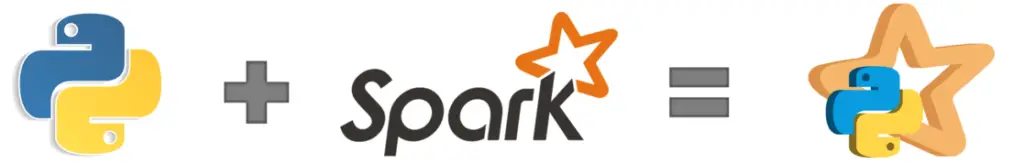

In [ ]:
import pyspark
from pyspark.sql import SparkSession

#Create SparkSession
spark = SparkSession.builder.master("local[1]").appName("myapp.com").getOrCreate()

In [2]:
spark

In [61]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('./data/churn.csv')
print(df.shape)
display(df.head(3))

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [32]:
df_spark = spark.read.csv('./data/churn.csv', header=True, inferSchema=True)
print(df_spark.count(), len(df_spark.columns))

3333 21


In [34]:
df_spark.show(3)

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+
|state|account length|area code|phone number|international plan|voice mail plan|number vmail messages|total day minutes|total day calls|total day charge|total eve minutes|total eve calls|total eve charge|total night minutes|total night calls|total night charge|total intl minutes|total intl calls|total intl charge|customer service calls|churn|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-------------

In [35]:
df=df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   string 
 1   account length          3333 non-null   Int64  
 2   area code               3333 non-null   Int64  
 3   phone number            3333 non-null   string 
 4   international plan      3333 non-null   string 
 5   voice mail plan         3333 non-null   string 
 6   number vmail messages   3333 non-null   Int64  
 7   total day minutes       3333 non-null   Float64
 8   total day calls         3333 non-null   Int64  
 9   total day charge        3333 non-null   Float64
 10  total eve minutes       3333 non-null   Float64
 11  total eve calls         3333 non-null   Int64  
 12  total eve charge        3333 non-null   Float64
 13  total night minutes     3333 non-null   Float64
 14  total night calls       3333 non-null   

In [36]:
df_spark.printSchema()

root
 |-- state: string (nullable = true)
 |-- account length: integer (nullable = true)
 |-- area code: integer (nullable = true)
 |-- phone number: string (nullable = true)
 |-- international plan: string (nullable = true)
 |-- voice mail plan: string (nullable = true)
 |-- number vmail messages: integer (nullable = true)
 |-- total day minutes: double (nullable = true)
 |-- total day calls: integer (nullable = true)
 |-- total day charge: double (nullable = true)
 |-- total eve minutes: double (nullable = true)
 |-- total eve calls: integer (nullable = true)
 |-- total eve charge: double (nullable = true)
 |-- total night minutes: double (nullable = true)
 |-- total night calls: integer (nullable = true)
 |-- total night charge: double (nullable = true)
 |-- total intl minutes: double (nullable = true)
 |-- total intl calls: integer (nullable = true)
 |-- total intl charge: double (nullable = true)
 |-- customer service calls: integer (nullable = true)
 |-- churn: boolean (nullable 

In [37]:
df[['area code', 'total day calls', 'total night calls']].head(3)

,area code,total day calls,total night calls
0,415,110,91
1,415,123,103
2,415,114,104


In [38]:
df_spark[['area code', 'total day calls', 'total night calls']].show(3)

+---------+---------------+-----------------+
|area code|total day calls|total night calls|
+---------+---------------+-----------------+
|      415|            110|               91|
|      415|            123|              103|
|      415|            114|              104|
+---------+---------------+-----------------+
only showing top 3 rows



In [39]:
df[df['area code']==415].head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False


In [40]:
df_spark[df_spark['area code']==45].show(3)

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+
|state|account length|area code|phone number|international plan|voice mail plan|number vmail messages|total day minutes|total day calls|total day charge|total eve minutes|total eve calls|total eve charge|total night minutes|total night calls|total night charge|total intl minutes|total intl calls|total intl charge|customer service calls|churn|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-------------

In [46]:
df.sort_values(by=['total day calls', 'account length'], ascending=True).head(4)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.0,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.0,...,119,16.33,168.8,95,7.6,7.2,4,1.94,1,False
1144,NH,155,408,353-6300,no,no,0,216.7,30,36.84,...,125,12.27,135.3,106,6.09,10.8,1,2.92,2,False
1989,MT,124,415,420-5652,no,yes,30,144.5,35,24.57,...,101,22.3,226.5,82,10.19,12.0,7,3.24,2,False


In [47]:
df_spark.orderBy(['total day calls', 'account length'], ascending=False).show(5)

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+
|state|account length|area code|phone number|international plan|voice mail plan|number vmail messages|total day minutes|total day calls|total day charge|total eve minutes|total eve calls|total eve charge|total night minutes|total night calls|total night charge|total intl minutes|total intl calls|total intl charge|customer service calls|churn|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-------------

In [48]:
df.agg({'total day calls':['sum', 'min', 'max'], 'account length':['sum', 'min', 'max']})

,total day calls,account length
sum,334752,336849
min,0,1
max,165,243


In [82]:
from pyspark.sql import functions as F
cols=['total day calls', 'account length']
for col in cols:
    df_spark.agg(F.sum(col), F.min(col), F.max(col)).show()

+--------------------+--------------------+--------------------+
|sum(total day calls)|min(total day calls)|max(total day calls)|
+--------------------+--------------------+--------------------+
|              334752|                   0|                 165|
+--------------------+--------------------+--------------------+

+-------------------+-------------------+-------------------+
|sum(account length)|min(account length)|max(account length)|
+-------------------+-------------------+-------------------+
|             336849|                  1|                243|
+-------------------+-------------------+-------------------+



In [68]:
df['state'].unique()

<StringArray>
['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'NE', 'WY', 'HI', 'IL',
 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'MN', 'SD',
 'NC', 'WA', 'NM', 'NV', 'DC', 'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND']
Length: 51, dtype: string

In [72]:
df_spark.select('state').distinct().show()

+-----+
|state|
+-----+
|   AZ|
|   SC|
|   LA|
|   MN|
|   NJ|
|   DC|
|   OR|
|   VA|
|   RI|
|   WY|
|   KY|
|   NH|
|   MI|
|   NV|
|   WI|
|   ID|
|   CA|
|   NE|
|   CT|
|   MT|
+-----+
only showing top 20 rows



In [75]:
df.groupby('state')['total day calls'].mean()[:10]

state
AK     95.269231
AL          99.1
AR    102.145455
AZ    100.109375
CA         104.5
CO     95.121212
CT     98.432432
DC    100.166667
DE     98.639344
FL         101.0
Name: total day calls, dtype: Float64

In [76]:
df_spark.groupBy('state').agg({'total day calls':'mean'}).show(10)

+-----+--------------------+
|state|avg(total day calls)|
+-----+--------------------+
|   AZ|          100.109375|
|   SC|  102.46666666666667|
|   LA|  103.50980392156863|
|   MN|   99.11904761904762|
|   NJ|   100.1029411764706|
|   DC|  100.16666666666667|
|   OR|   95.73076923076923|
|   VA|  105.36363636363636|
|   RI|  100.43076923076923|
|   WY|  102.22077922077922|
+-----+--------------------+
only showing top 10 rows

